## Gibbs Sampling 설명

(1) 목적
Target joint distribution $p(x_1,x_2,\dots,x_n)$를 따르는 $X \sim p(X)$를 샘플링

(2) 절차

Step 1) $X^{(0)}$를 초기화. $X^{(0)}=(x_1^{(0)},x_2^{(0)},\dots,x_n^{(0)})$

Step 2) $x_1^{(1)}\sim p(x_1^{(1)}|x_2^{(0)},x_3^{(0)},\dots,x_n^{(0)})$를 샘플

Step 3) $x_2^{(1)}\sim p(x_2^{(1)}|x_1^{(1)},x_3^{(0)},\dots,x_n^{(0)})$를 샘플

Step 4) Step 3)을 n까지 반복

Step 5) Step 1) ~ Step 4)를 총 N회 수행

(3) 예제 (출처 : https://ratsgo.github.io/statistics/2017/05/31/gibbs/)

주사위를 두개 던졌을 때 첫번째 주사위 눈을 $x_1$, 두 주사위 눈의 합을 $x_2$라고 하자.

$x_1$과 $x_2$의 결합확률밀도함수 $p(x_1,x_2)$는 다음과 같다.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def roll_a_dice():
    # 주사위 눈은 1 ~ 6
    # 각 눈이 선택될 확률은 동일 (uniform) 
    return random.randint(1,6)
def direct_sample():
    d1 = roll_a_dice();
    d2 = roll_a_dice();
    return d1, d1+d2

조건부 확률밀도함수 $p(x_1|x_2)$와 $p(x_2|x_1)$는 다음과 같다.

In [3]:
def random_x1_given_x2(x2):
    # x2 값을 알고 있다는 전제하에 x1 값이 선택될 확률
    # 두 주사위 합이 7보다 같거나 작으면,
    if x2 <= 7:
        # 첫 번째 주사위의 눈은 1 ~ 6
        # 각 눈이 선택될 확률은 동일
        return random.randint(1, x2-1)
    # 만약 총 합이 7보다 크면,
    else:
        # 첫 번째 주사위 눈은 x2-6, x2-5, ..., 6
        # 각 눈이 선택될 확률은 동일
        return random.randint(x2-6, 6)
def random_x2_given_x1(x1):
    # x1 값을 알고 있다는 전제하에 x2 값이 선택될 확률
    # x2는 x1+1, x1+2, x1+3, x1+4, x1+5, x1+6 중에 하나
    return x1+roll_a_dice()

Gibbs Sampling은 다음과 같이 수행된다.

In [4]:
def gibbs_sample(N=100):
    # 초기값이 무엇이든 상관 없음
    x1 = random.randint(1,6);
    x2 = x1 + random.randint(1,6)
    for _ in range(N):
        x1 = random_x1_given_x2(x2);
        x2 = random_x2_given_x1(x1);
    return x1, x2

In [5]:
sample_no = 1000;
gibbs_x1, gibbs_x2 = np.zeros(sample_no), np.zeros(sample_no);
x1, x2 = np.zeros(sample_no), np.zeros(sample_no);
for i in range(sample_no):
    gibbs_x1[i], gibbs_x2[i] = gibbs_sample(N=100)
    x1[i], x2[i] = direct_sample()

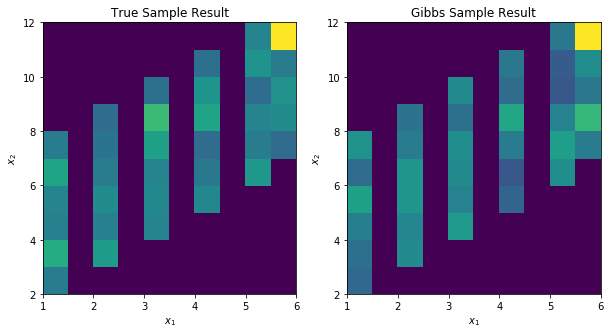

In [6]:
plt.figure(figsize=(10,5));
plt.subplot(121); plt.hist2d(x1,x2); plt.xlabel('$x_1$'); plt.ylabel('$x_2$'); plt.title('True Sample Result');
plt.subplot(122); plt.hist2d(gibbs_x1,gibbs_x2); plt.xlabel('$x_1$'); plt.ylabel('$x_2$'); plt.title('Gibbs Sample Result');